In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [11]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train.shape

(426, 30)

In [16]:
X_test.shape

(143, 30)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
## sigmoid used for binary classification

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test),batch_size=16)

Epoch 1/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6852 - val_loss: 0.6564
Epoch 2/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6265 - val_loss: 0.6001
Epoch 3/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5647 - val_loss: 0.5328
Epoch 4/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4934 - val_loss: 0.4556
Epoch 5/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4206 - val_loss: 0.3851
Epoch 6/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3570 - val_loss: 0.3251
Epoch 7/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3055 - val_loss: 0.2791
Epoch 8/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2659 - val_loss: 0.2451
Epoch 9/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2358 - val_loss: 0.2198
Epoch 10/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2122 - val_loss: 0.2003
Epoch 11/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1931 - val_loss: 0.1850
Epoch 12/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1

In [23]:
losses =pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.685154,0.656433
1,0.626506,0.600116
2,0.564744,0.532810
3,0.493361,0.455611
4,0.420565,0.385083
...,...,...
595,0.000330,0.398483
596,0.000355,0.401727
597,0.000330,0.403805
598,0.000323,0.400079


<Axes: >

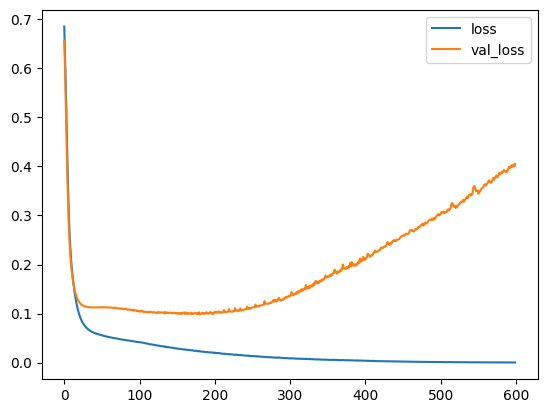

In [24]:
losses.plot()

## here the new concept, overfitting occurs so we do early stopping


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

history = model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), batch_size=16,callbacks=[early_stop])

Epoch 1/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6609 - val_loss: 0.6341
Epoch 2/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6123 - val_loss: 0.5747
Epoch 3/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5505 - val_loss: 0.5144
Epoch 4/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4912 - val_loss: 0.4501
Epoch 5/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4294 - val_loss: 0.3881
Epoch 6/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3743 - val_loss: 0.3341
Epoch 7/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3277 - val_loss: 0.2899
Epoch 8/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2904 - val_loss: 0.2548
Epoch 9/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2608 - val_loss: 0.2272
Epoch 10/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2371 - val_loss: 0.2053
Epoch 11/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2178 - val_loss: 0.1878
Epoch 12/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2

In [28]:
losses =pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.660864,0.634077
1,0.612265,0.574655
2,0.550461,0.514439
3,0.491171,0.450084
4,0.429449,0.388087
...,...,...
66,0.055808,0.096804
67,0.055584,0.096927
68,0.055359,0.097101
69,0.055140,0.097228


<Axes: >

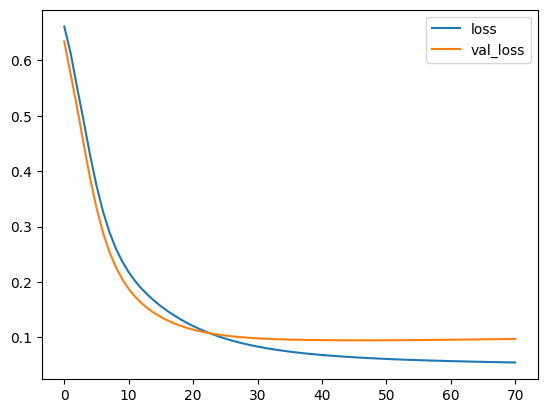

In [29]:
losses.plot()

## Adding Dropout Layers to Further Prevent Overfitting
Dropout layers randomly turn off a fraction of neurons during training to reduce overfitting. We import Dropout and add it after each dense layer.

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), batch_size=16, callbacks=[early_stop])

Epoch 1/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7144 - val_loss: 0.6688
Epoch 2/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6794 - val_loss: 0.6405
Epoch 3/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6696 - val_loss: 0.6148
Epoch 4/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6169 - val_loss: 0.5836
Epoch 5/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5985 - val_loss: 0.5463
Epoch 6/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5624 - val_loss: 0.5025
Epoch 7/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5237 - val_loss: 0.4528
Epoch 8/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4860 - val_loss: 0.3978
Epoch 9/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4434 - val_loss: 0.3567
Epoch 10/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4273 - val_loss: 0.3180
Epoch 11/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4137 - val_loss: 0.2898
Epoch 12/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3

In [32]:
losses =pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.714413,0.668759
1,0.679404,0.640490
2,0.669605,0.614816
3,0.616854,0.583564
4,0.598503,0.546273
5,0.562381,0.502491
6,0.523718,0.452838
7,0.485962,0.397844
8,0.443424,0.356735
9,0.427286,0.318032


<Axes: >

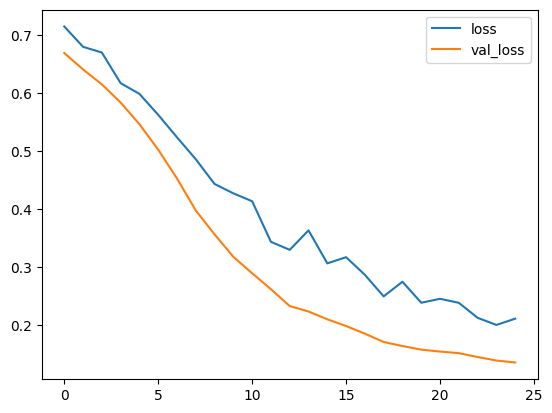

In [33]:
losses.plot()

In [36]:
predictions = np.round(model.predict(X_test))
## for binary classification, we round the predictions to get class labels

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

[[52  3]
 [ 3 85]]
